## Introduction to DICOM, NIfTI and basic preprocessing

In this notebook, we will explore two common medical imaging file formats: **DICOM (Digital Imaging and Communications in Medicine)** and **NIfTI (Neuroimaging Informatics Technology Initiative)**. These formats are widely used in clinical and research environments respectively, each with its own strengths and use cases.

The main objectives of this module are:
- Understanding DICOM Files
-  Understanding NIfTI Files
- Basic Image Visualization (DICOM & NIfTI)
- Basic Preprocessing and Image Quality Assessment

### 1. Introduction to DICOM Files

#### What is a DICOM File?
[DICOM](https://www.dicomstandard.org/) (Digital Imaging and COmmunications in Medicine) is the de-facto standard that establishes rules that allow medical images (X-Ray, MRI, CT) and associated information to be exchanged between imaging equipment from different vendors, computers, and hospitals. It not only stores the image but also includes important metadata such as patient details, modality (e.g., CT, MRI), image orientation, pixel spacing, and much more. The DICOM format provides a suitable means that meets health information exchange (HIE) standards for transmission of health related data among facilities and HL7 standards which is the messaging standard that enables clinical applications to exchange data.

DICOM files typically have a .dcm extension and provides a means of storing data in separate ‘tags’ such as patient information, image/pixel data, the machine used, etc.

For more information, refer to : https://www.dicomstandard.org/about-home

#### Use Cases:
- **DICOM** is heavily used in hospitals and clinics because it integrates with medical imaging equipment.
- **Clinical Metadata**: DICOM files include vital information about the patient and imaging modality, which is essential for diagnosis and treatment.

#### Structure of a DICOM File
A typical DICOM file contains:
- **Header**: Contains metadata such as patient ID, modality, and image acquisition details.
- **Image Data**: The pixel data representing the actual image.

#### Load and read a DICOM image


The following package supports working with DICOM files:

- [pydicom](https://pydicom.github.io/) is a dedicated library for handling DICOM files, allowing access to both pixel data and the associated metadata (e.g., patient details, equipment information, scan parameters). pydicom is ideal when working in medical contexts where you need to inspect, modify, or extract specific information from the DICOM headers in addition to the image data. `pydicom` is best for comprehensive access to both image and metadata, useful when medical details are required for further analysis. It provides pixel data as a NumPy array via the pixel_array attribute, which can be processed and visualized easily. `pydicom` is commonly used with `numpy` and `matplotlib`. `numpy` provides a flexible and efficient structure (the NumPy array) to store and manipulate image data across all three libraries (imageio, pydicom, and scipy.ndimage) and `matplotlib.pyplot` is used to visualize the image data after it's loaded and processed, displaying it in an intuitive and customizable way.


When working with DICOM files, they may sometimes be compressed into a .zip archive. To handle this, we first need to unzip the files before reading them. This can be done easily using Python's `zipfile` module to unzip the DICOM file, or you can unzip the file using the GUI.

To read the image, using the `pydicom` library use the `dcmread()` function, which gives you access to the pixel data via the pixel_array attribute.

In [22]:
import zipfile
import os
# Path to the zip file and the directory where the contents will be extracted
zip_file_path = '/path/to/your/dicom_files.zip'
extract_dir = '/path/to/extract/'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Extracted files to {extract_dir}")
    
    # List the contents of the extracted folder
    extracted_files = os.listdir(extract_dir)
    print("Extracted DICOM files:")
    for file in extracted_files:
        print(file)
else:
    print(f"Zip file not found: {zip_file_path}")

# Directory containing your DICOM files
dicom_dir = 'DICOM/DICOM/'

Zip file not found: /path/to/your/dicom_files.zip


In [3]:
#Load required libraries
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

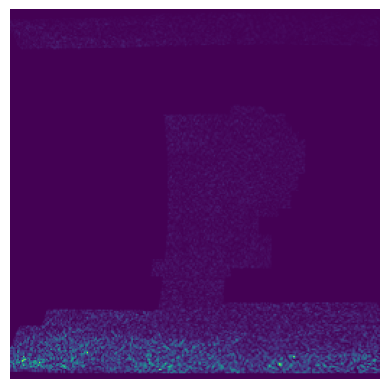

In [ ]:
# Load a DICOM file

# -- Your code here -- #
# Load a DICOM file
dicom_data = pydicom.dcmread('DICOM/DICOM/IM-0004-0184.dcm')

# Display the DICOM file

plt.imshow(dicom_data.pixel_array)
plt.axis('off')
plt.show()


#### Read Metadata

Metadata refers to supplementary information that describes or provides context for the primary data, such as images or documents. In the context of medical imaging, metadata includes details about how, when, and with what equipment an image was acquired. This might involve information such as the date of the scan, scanner settings, patient demographics (excluding personally identifiable information if anonymized), and details about the imaging modality.
Since this scan was acquired for research purposes, the "patient" information does not contain personally-identifying information like the name or birth. date of the person who was scanned.

In [14]:
print (dicom_data)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 198
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.176.3596.7771172.7255.1265293350.565
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.5.4
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_354'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.840.113619.2.176.3596.7771172.7255.1265293350.565
(0008,0020) Study Date                          DA: 

In DICOM files, metadata is organized into various elements. These elements store both the image data and essential metadata. 
The print output shows a list of the data elements (or elements for short) present in the dataset, one element per line. The format of each line is:

- `(0008, 0005)`: The element’s tag, as (group number, element number) in hexadecimal

- `Specific Character Set`: the element’s name, if known

- `CS`: The element’s Value Representation (VR), if known

- `‘ISO_IR_100’`: the element’s stored value

There are three main categories of DICOM elements:

- **Standard Elements**: Defined in the DICOM standard, have even group numbers, and store common metadata.
    
    Example:

        `(0008,0016)` - SOP Class UID
        `(0008,0020)` - Study Date
- **Repeating Group Elements**: Allow multiple occurrences at the same level, with group numbers in a range.

    Example:

        `(60xx,3000)` - Overlay Data (where xx can be 0x6000, 0x6002, 0x6004, etc., up to 0x601E).

- **Private Elements**: Created by manufacturers, have odd group numbers, and can store vendor-specific data. 

    Example:

         `(0043,104E)` - [Duration of X-ray on] (Private Element)




This structure allows DICOM to be highly extensible, accommodating both standardized and vendor-specific data. You can explore these elements using pydicom to retrieve both standard and custom metadata from medical images.

In pydicom, you can access all of these elements and their values directly from the DICOM object.

In [15]:
# Extract and print metadata
print("Patient ID:", dicom_data.PatientID)

Patient ID: AARONTEST


The `pydicom` library allows you to access the image's pixel data stored in the DICOM file using the pixel_array attribute. This data represents the raw pixel intensity values of the medical image, which can be visualized using libraries like matplotlib.

In the following code, we use pydicom to read the DICOM file and extract the pixel data. We then use matplotlib to display the image in grayscale, which is common for medical images such as X-rays, CT scans, and MRIs.

In [16]:
# Extract pixel data
dicom_image = dicom_data.pixel_array

# Print the DICOM image as a NumPy array
print("DICOM Image as a NumPy Array:")
print(dicom_image)

DICOM Image as a NumPy Array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
# Print the dimensions of the DICOM image
print("Image dimensions:", dicom_image.shape)



# You can also print some statistics for better readability
#min_pixel, max_pixel and mean_pixel values

min_pixel = np.min(dicom_image)
max_pixel = np.max(dicom_image)
mean_pixel = np.mean(dicom_image)

print("Min pixel value:", min_pixel)
print("Max pixel value:", max_pixel)
print("Mean pixel value:", mean_pixel)





Image dimensions: (256, 256)
Min pixel value: 0
Max pixel value: 2221
Mean pixel value: 60.26446533203125


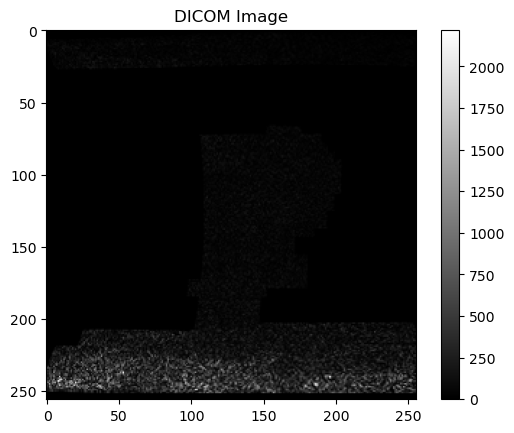

In [19]:
# Visualize the DICOM image
plt.imshow(dicom_image, cmap='gray')
plt.title('DICOM Image')
plt.colorbar()
plt.show()

The metadata and pixel information has been extracted here for a single .dcm file. We can also index the multiple .dcm files we extracted and perform the same functions as:

Shape of brain_slices array: (184, 256, 256)
Pixel array of the first slice:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Min pixel value: 0
Max pixel value: 8847
Mean pixel value: 801.3816240559454


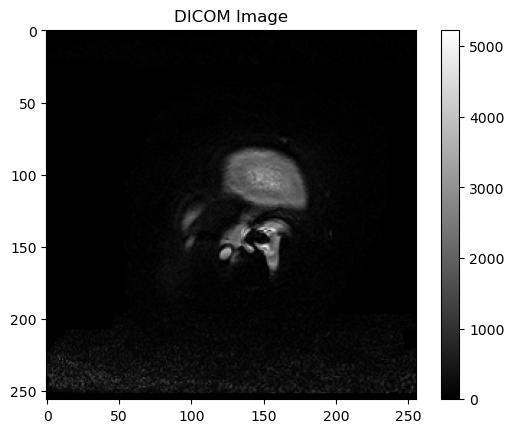

In [29]:
# Get all DICOM files in the directory
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith('.dcm')]

# Sort files by instance number or another DICOM attribute if required
dicom_files.sort(key=lambda x: pydicom.dcmread(x).InstanceNumber)

# Initialize a list to store all slices
brain_slices = []

# Read each DICOM file and store the pixel data in the brain_slices list
for dicom_file in dicom_files:
    # -- Your code here -- #
    # Read the DICOM file
    dicom_data = pydicom.dcmread(dicom_file)
    # Extract the pixel data
    pixel_data = dicom_data.pixel_array
    # Append the pixel data to the brain_slices list
    brain_slices.append(pixel_data)




# Convert to a NumPy array for easier manipulation (optional)
# -- Your code here -- #

# Now you can access each slice like brain_slice[0], brain_slice[1], etc.
# Print the shape (dimensions) of the brain_slices array
# Print the pixel array of the first slice (brain_slice[0])
# You can also print some statistics for better readability

# Convert to a NumPy array for easier manipulation
brain_slices = np.array(brain_slices)

# Print the shape (dimensions) of the brain_slices array
print("Shape of brain_slices array:", brain_slices.shape)

# Print the pixel array of the first slice (brain_slices[0])
print("Pixel array of the first slice:")
print(brain_slices[0])

# Print some statistics for better readability
min_pixel = np.min(brain_slices)
max_pixel = np.max(brain_slices)
mean_pixel = np.mean(brain_slices)

print("Min pixel value:", min_pixel)
print("Max pixel value:", max_pixel)
print("Mean pixel value:", mean_pixel)

# -- Your code here -- #

# Visualize the DICOM image
plt.imshow(brain_slices[15], cmap='gray')
plt.title('DICOM Image')
plt.colorbar()
plt.show()

Unlike the 0-255 pixel intensity range in standard images, MRI scans in DICOM format store pixel values that represent signal intensities. MRI images capture different contrasts based on tissue properties (e.g., T1-weighted, T2-weighted, etc.), and these signal intensities can vary widely depending on the type of sequence and scan parameters. Pixel values can range from 0 to very high values (7000-9000 as above), depending on the scanning modality, resolution, and what part of the body is being imaged.

```
[[ 0  0  0 ...  8  5  2]
 [ 0  0  0 ...  6  0  5]
 [ 0  0  0 ... 17 24  5]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
```
This array represents the raw pixel intensity values of the DICOM slice, where:

- 0 typically represents the background or areas outside the brain, where no signal is detected.
- Higher values represent areas with higher signal intensity, which may correlate with different tissue types or abnormalities (depending on the MRI modality).

The output pixel statistics for slice [0] represents:

- Min pixel value (0): This is common for regions outside the tissue, like air or background.
- Max pixel value (7017): This could correspond to areas of high signal intensity, such as regions with strong MRI signals like blood vessels or contrast-enhanced regions.
- Mean pixel value (1246.57): This gives you an idea of the overall signal intensity of the slice, indicating the average brightness across the slice.

The reason for such values, in comaprison to the traditional 0-255 range we deal with for standard image formats (JPEG, PNG, etc.) is because these formats use 8-bit per channel color depth. These values represent the intensity of each pixel for grayscale images or the intensity of each color channel (red, green, blue) in color images.

In medical images, particularly in formats like DICOM or NIfTI, pixel values represent more than just simple intensity. They often carry information about the tissue characteristics, physical properties (like density or radiodensity), or signal intensities from imaging machines like CT or MRI. These values are stored in floating-point or higher-bit integers to capture a wider dynamic range of intensities, which is essential for accurate diagnosis. 

MRI scanners store signal intensities using 12-bit or 16-bit depth, which means that pixel values can exceed the 255 range of standard images, allowing for much higher precision in intensity values. In this case, the maximum pixel value of 7017 is quite typical for high-resolution medical images, particularly in MRI.
The full range of pixel values might not always be directly useful for visualization. In clinical practice, radiologists use windowing techniques to adjust the display of these pixel values to fit the display range (e.g., 0-255), highlighting specific tissues of interest. However, for data analysis, usually we work with the raw pixel values (like in an array), which preserve the full dynamic range of the MRI scan. 

The non-normalized image displayed perfectly suggests that the DICOM image already contains pixel values in an appropriate range for visualization. Commonly, DICOM files include fields like `RescaleSlope` and `RescaleIntercept`, which transform raw pixel values into a more meaningful range (e.g., Hounsfield units for CT scans). MRI scans often have pixel intensities that map to tissue types or structures in the body, so forcing them into a 0-255 range can remove useful information.

#### Visualize a slice through different planes

Since the data are a 3D NumPy array, it is very easy to "reslice" the image and visualize the head from one of the other two orientations, axial and coronal. Below we pass `:` to select all sagittal slices, and `128` for the second dimension to get the slice midway through the volume, in the axial plane. Again, we omit the third dimension and so `:` is assumed:

Volume shape: (184, 256, 256)


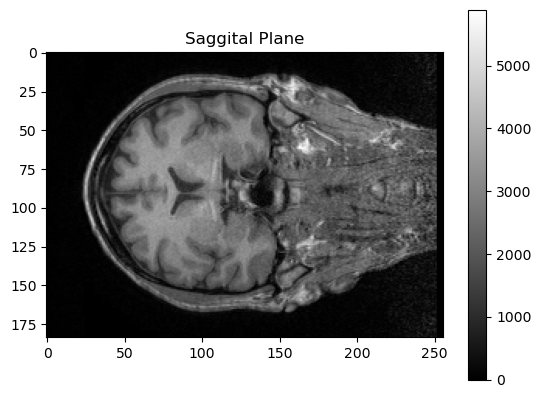

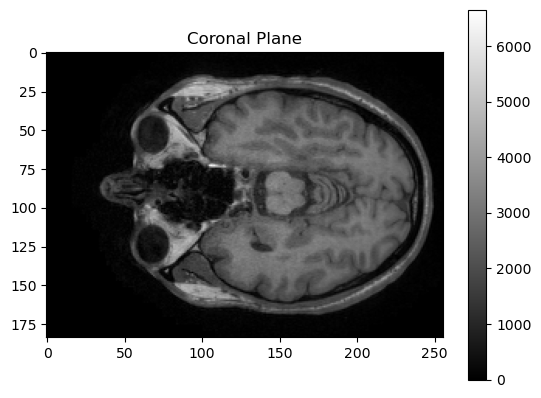

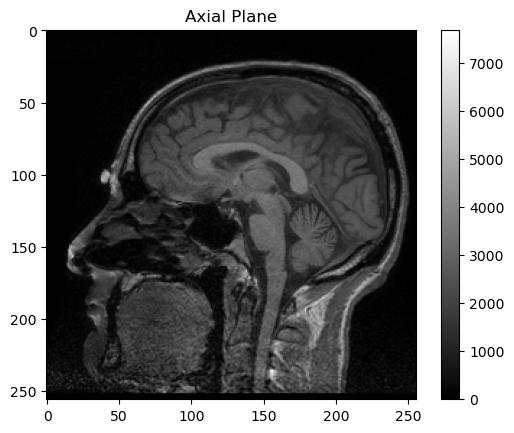

In [ ]:
# Function to load DICOM volume
def load_dicom_volume(dicom_dir):
    slices = []
    for filename in sorted(os.listdir(dicom_dir)):
        if filename.endswith('.dcm'):
            dicom_file = os.path.join(dicom_dir, filename)
            dicom_data = pydicom.dcmread(dicom_file)
            slices.append(dicom_data.pixel_array)
    return np.stack(slices)

    # Stack slices into a 3D volume
    
# Load the volume
# Ensure the volume has the expected dimensions
# Determine middle slices for each plane
# Load the volume
dicom_volume = load_dicom_volume(dicom_dir)
# Ensure the volume has the expected dimensions
print("Volume shape:", dicom_volume.shape)
# Determine middle slices for each plane
saggital_slice = dicom_volume.shape[2] // 2
coronal_slice = dicom_volume.shape[1] // 2
axial_slice = dicom_volume.shape[0] // 2


# Plotting Saggital Plane (Z-axis slices)
plt.imshow(dicom_volume[:, :, saggital_slice], cmap='gray')
plt.title('Saggital Plane')
plt.colorbar()
plt.show()

# Plotting Coronal Plane (Y-axis slices)
plt.imshow(dicom_volume[:, coronal_slice, :], cmap='gray')
plt.title('Coronal Plane')
plt.colorbar()
plt.show()

# Plotting Axial Plane (X-axis slices)
plt.imshow(dicom_volume[axial_slice, :, :], cmap='gray')
plt.title('Axial Plane')
plt.colorbar()
plt.show()

# -- Your code here -- #






#### Plotting an image histogram

As we saw above, the image is stored as a NumPy array, in which each voxel in the image is represented as a number, which is mapped to an intensity value in the colourmap when plotting. Larger values appear as brighter (whiter), and lower values appear as darker.

Histograms of the anatomical images show the number of voxels of a given intensity value. These can be informative because the distribution of intensity values in an anatomical image is not uniform. Instead, as we can see above, there are many very dark voxels (outside of the head, and in some of the fluid-filled spaces inside the head), and then clusters of voxels that are darker grey (the grey matter, largely in the cerebral cortex that forms the outer layer of the brain), lighter grey (the white matter that comprises much of the inside of the brain), and also some very bright areas that are primarily due to areas of fat concentration.

We can use ndimage's `.histogram()` function to plot a histogram of our brain volume. We use this rather than the NumPy `histogram` function, because ndimage's function is designed to work with 3D images. This function requires several arguments, including the minimum and maximum intensity values that define the range of the *x* axis of the histogram, and the number of bins:

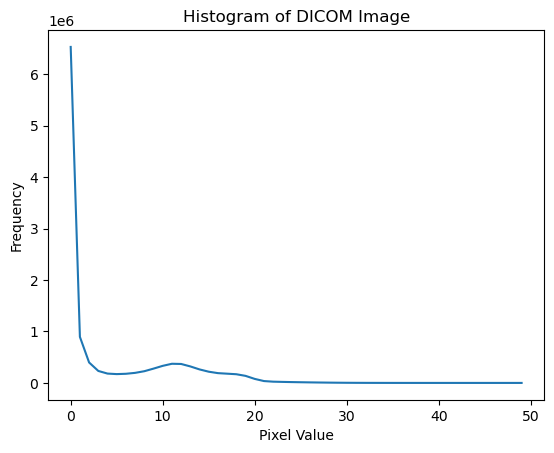

In [39]:

# Plot the histogram
# Define the number of bins for the histogram
num_bins = 50

# Calculate the histogram
#hist, bin_edges = ndi.histogram(brain_slices, min_pixel, max_pixel, num_bins)
plt.plot(ndi.histogram(brain_slices, min_pixel, max_pixel, num_bins))
plt.title('Histogram of DICOM Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In the histogram above, there is a large peak close to zero which represents the fact that a large number of voxels in the image don't contain the head at all, and therefore have values at or close to zero. We can see a peak just above 10 on the *x* axis (note that the numbers on the *x* axis are bin numbers, not intensity values), with a slight decrease and then a second small peak just before 20, followed by a flat area. The peaks just above 10 and just below 20 reflect the concentration of similar intensity values corresponding to grey and white matter respectively. 

### 2. Introduction to NIfTI Files

#### What is a NIfTI File?
[NIfTI](https://nifti.nimh.nih.gov/) (Neuroimaging Informatics Technology Initiative) is a file format initially designed for neuroimaging data, such as fMRI and MRI. While it remains highly popular in neuroimaging, NIfTI is now also used in various other fields that involve volumetric medical imaging, such as cancer research and anatomical imaging.

NIfTI was created to standardize image storage across different software tools. It provides a structured way to store 3D or 4D imaging data and includes crucial metadata for accurate image orientation, which helps avoid potential errors during analysis. NIfTI files are typically stored with a .nii extension and can be compressed using Gzip to save storage space.


#### Use Cases
- **NIfTI** is predominantly used in research settings, especially in neuroimaging studies.
- **Efficient Storage**: NIfTI focuses on image data ather than clinical metadata, making it a more compact format for storing 3D or 4D volumes.

#### Structure of a NIfTI File
A typical NIfTI file contains:
- **Header**: Includes metadata such as image dimensions, voxel sizes, and orientation.
- **Image Data**: The actual voxel data representing the 3D or 4D image.

#### Loading and Visualizing NIfTI Files
To work with NIfTI files, we use specific libraries designed for handling this format:

- `nibabel`: A library dedicated to reading and writing NIfTI files. It allows access to both image data and header information, making it possible to inspect and modify metadata, as well as manipulate image data.
- `nilearn`: A library built on top of nibabel that provides additional tools for statistical analysis and visualization of neuroimaging data. It simplifies tasks such as brain image visualization and analysis, making it ideal for research workflows.


Just as for pydicom, these libraries use `numpy` and `matplotlib` for  handling and manipulating image data loaded from NIfTI files and for creating visualizations.

#### Loading and Visualizing DICOM Files

Let’s start by loading a DICOM file and inspecting its metadata. For this lab we will work with structural MRI images of a brain, visualize them as slices, and perform a couple of simple image processing operations on images.

Structural MRI is a generic term for any MRI scan intended to image the structure of the body. These are sometimes called anatomical scans. This is in contrast to functional MRI, which are scans designed to measure some aspect of physiological function (typically neural activation).

In [41]:
#Load required libraries
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [45]:
# Load a NiFTI file
# What is the type of this object?
# Path to the zip file and the directory where the contents will be extracted
zip_file_path = 'brain.zip'
EXtract_nifti = 'brain/'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(EXtract_nifti)
    print(f"Extracted files to {EXtract_nifti}")
    
    # List the contents of the extracted folder
    extracted_files = os.listdir(EXtract_nifti)
    print("Extracted Nifti files:")
    for file in extracted_files:
        print(file)
else:
    print(f"Zip file not found: {zip_file_path}")

# Directory containing your DICOM files
Nifti_dir = 'brain'

BadZipFile: File is not a zip file

#### View metadata

We can view the image's header by printing it (note that due to how the NiBabel `Nifti1Image` object is coded, we need to `print()` the header rather than just asking for it as a property):

In [ ]:
# Extract and print metadata

# -- Your code here -- #

#### Access data in the NIfTI object

NiBabel's handling of the NIfTI format data is not quite as elegant. Rather than being able to access the data directly by referencing the name of the object (in this case, `brain_vol`), we need to use the method `get_fdata()` to do this (the "f" in this method name stands for "floating point", as this is the type of data it returns). We will assign the result of this to a new variable so that it's easy to work with. 

In [ ]:
# Extract pixel data
# -- Your code here -- #

We see that the data is a familiar NumPy array, and below we see the dimensions are identical to what we saw for this image in the previous lesson:

In [ ]:
# Print the dimensions of the DICOM image
# -- Your code here -- #

#### Visualize a slice

We can use `.plt.imshow()` as in the previous lesson:

In [ ]:
# Extract the middle slice
# -- Your code here -- #

Note that our image is rotated, so use can use `ndi.rotate` to fix this:

In [ ]:
# -- Your code here -- #

#### Plot a series of slices

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_nii.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    # -- Your code here -- #

#### Calculate the pixel statistics

In [ ]:
for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    slice_data = brain_vol_nii[img, :, :]
    
    # Handle negative values if they are unexpected
    # Option 1: Use absolute values
    # slice_data = np.abs(slice_data)
    
    # Option 2: Report if negative values are present

    
    # Compute statistics for the current slice

    # -- Your code here -- #

Negative pixel values in the NIfTI images are be related to the high range of pixel intensities observed in the MRI data. From the header of this NiFTI:

- The use of `float32` format, which supports negative values.
- Missing scaling information (`scl_slope` and `scl_inter`), leaving pixel values in their raw form.
- Possible baseline or mean adjustments applied to the image data during preprocessing.

In [ ]:
# Ensure the volume has the expected dimensions

# Determine middle slices for each plane


# Plotting Axial Plane (Z-axis slices)
# Plotting Coronal Plane (Y-axis slices)
# Plotting Sagittal Plane (X-axis slices)
# Plotting Rotated Axial Plane
# Plotting Rotated Coronal Plane
# Plotting Rotated Sagittal Plane


# -- Your code here -- #


The issue with the rotations of the coronal and sagittal planes for NIfTI images likely arises because the axes in the NIfTI format may be oriented differently than expected. To ensure correct orientation for the coronal and sagittal planes, it’s important to carefully adjust the rotation and perhaps transpose the axes before applying the rotate function.

In [ ]:
# Plotting the Coronal Plane (Y-axis slices) - Adjusted with Transpose

# Plotting the Sagittal Plane (X-axis slices) - Adjusted with Transpose

# Now, let's rotate each plane correctly
# Plotting Rotated Axial Plane (no change in orientation)

# Plotting Rotated Coronal Plane (correct transpose and then rotate)

# Plotting Rotated Sagittal Plane (correct transpose and then rotate)


# -- Your code here -- #

#### Plot with NiLearn

While SciPy's ndimage module was designed for working with a wide variety of image types, NiLearn was designed to work with neuroimaging data specifically. As such, it's tools are a bit easier to use and more purpose-built for tasks that neuroimaging data scientists might want to perform. For example, we can plot the NiBabel NIfTI image object directly without first having to extract the data, using the `plot_img()` function from NiLearn's `plotting` module:

One nice thing that we see is that since NiLearn is neuroimaging-aware, it explicitly adds labels to our plot showing us clearly which the left and right hemispheres are.

NiLearn's plotting library uses Matplotlib, so we can use familiar tricks to do things like adjust the image size and colormap:

In [ ]:
from nilearn import plotting

# -- Your code here -- #

The `plot_img()` function also provides a variety of ways to display the brain, with much less code than we had to use when working with raw NumPy arrays and Matplotlib functions:

In [ ]:
# -- Your code here -- #

We can use the `cut_coords` kwarg to specify there to centre the crosshairs and "cuts" through the image that we visualize. In this image, the coordinates are relative to the *isocenter of the MRI scanner — the centre of the magnetic field inside the scanner. The position of a person's head relative to this isocenter will vary from individual to individual, and scan to scan, due to variations in head size and the optimizations used by the MRI technician and scanner. But we can use the coordinates printed in the above image (which defaulted to the centre of the image volume) and some trial-and-error to get a different view through the brain:

In [ ]:
# -- Your code here -- #

`plot_img()` also has a few other ways to see multiple slices at once:

In [ ]:
# -- Your code here -- #

#### Plotting the image histogram

In [ ]:
# Access the image data from the NIfTI file
brain_vol_data = brain_vol_nii.get_fdata()

# Create a histogram using numpy for the NIfTI data

# Plot the histogram
# -- Your code here -- ###

# Flatten the image data to 1D for the histogram
# -- Your code here -- #

### Basic Preprocessing and Image Quality Assessment

There are several image quality measurements that are commonly used in medical image analysis to assess the quality of an image, These include metrics that evaluate noise, contrast, sharpness, and overall fidelity of the image. Some key image quality metrics that can be included are:


1. **Signal-to-Noise Ratio (SNR)**: SNR measures the amount of signal present in an image compared to the noise. Higher SNR values indicate clearer images with less noise. The SNR can be calculated by dividing the mean pixel intensity of the signal by the standard deviation of the background (noise).
2. **Contrast-to-Noise Ratio (CNR)**: CNR is similar to SNR but evaluates the contrast between two regions of interest, making it useful for comparing different tissues (e.g., tumor vs. normal tissue). CNR is the difference in mean intensity between two regions divided by the standard deviation of the background.
3. **Sharpness (Edge Detection)**: Sharpness can be quantified by measuring the gradient magnitude at edges in the image. Sharper edges usually correspond to better image quality. You can use methods like the Sobel or Laplacian filter to assess image sharpness.
4. **Root Mean Square Error (RMSE)**:RMSE compares the difference between the original image and a processed version of the image (e.g., after filtering or compression) to evaluate how much detail has been lost. RMSE is calculated by taking the square root of the mean squared difference between two images.

In [ ]:
from scipy.ndimage import sobel
from sklearn.metrics import mean_squared_error
from scipy.ndimage import gaussian_filter
from sklearn.metrics import mean_squared_error

# Load the NIfTI file
# -- Your code here -- #

# Define regions (adjust slices as needed)

# -- Your code here -- #


#1. Signal-to-Noise Ratio (SNR)
def calculate_snr(image_data, signal_region, noise_region):
    # -- Your code here -- #

print(f"Signal-to-Noise Ratio (SNR): {snr_value}")

#2. Contrast-to-Noise Ratio (CNR)
def calculate_cnr(image_data, region1, region2, noise_region):
    # -- Your code here -- #

print(f"Contrast-to-Noise Ratio (CNR): {cnr_value}")

#3. Sharpness
def calculate_sharpness(image_data):
    # -- Your code here -- #

print(f"Sharpness: {sharpness_value}")

# Display a slice of the edge magnitude



# 4. Root Mean Square Error (RMSE)
# Apply Gaussian filter to create a processed version of the image

def calculate_rmse(original_image, processed_image):
    # -- Your code here -- #

print(f"Root Mean Square Error (RMSE): {rmse_value}")

#Display a slice of the processed image
# -- Your code here -- #

In [ ]:

from scipy.ndimage import sobel, gaussian_filter
from sklearn.metrics import mean_squared_error


# Load the DICOM file
# Define regions (adjust slices as needed)

# 1. Signal-to-Noise Ratio (SNR)
def calculate_snr(image_data, signal_region, noise_region):
    # -- Your code here -- #

print(f"Signal-to-Noise Ratio (SNR): {snr_value}")

# 2. Contrast-to-Noise Ratio (CNR)
def calculate_cnr(image_data, region1, region2, noise_region):
    # -- Your code here -- #

print(f"Contrast-to-Noise Ratio (CNR): {cnr_value}")

# 3. Sharpness
def calculate_sharpness(image_data):
    # -- Your code here -- #
    
print(f"Sharpness: {sharpness_value}")


# 4. Root Mean Square Error (RMSE)
# Apply Gaussian filter to create a processed version of the image

def calculate_rmse(original_image, processed_image):
    # -- Your code here -- #

print(f"Root Mean Square Error (RMSE): {rmse_value}")

# Display a slice of the processed image
# -- Your code here -- #

### Coding Project - **DICOM and NIfTI enhancement**

Convert a the.dcm file used in this notebook to a .nii file, and assess the conversion using image quality measurements

You have previously worked with basic image processing techniques such as filtering and edge detection on standard image formats like PNG and JPEG. Explore how these same methods can be applied to DICOM and NIfTI images. Identify commonalities and differences in how these techniques affect image quality across different formats. 

Assess the impact of these image processing steps you have chosen on the image quality by calculating metrics such as Root Mean Square Error (RMSE), SNR, CNR, etc. Compare the image quality metrics and preprocessing effects between DICOM and NIfTI formats.